In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation, Reshape, Conv2DTranspose
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
input_shape = (227, 227, 3)
batch_size = 32

In [3]:
csv_food = pd.read_csv('ingredient_recipe.csv')

csv_food['Image_Name'] = csv_food['Image_Name'].apply(lambda x: 'dataset_train/food_images/' + x + '.jpg')

unique_labels = csv_food['Ingredients'].unique()

images_food_path = csv_food['Image_Name']

labels_food = csv_food['Ingredients']

le = LabelEncoder()
le.fit(unique_labels)
labels_food = le.transform(labels_food)
num_classes = len(unique_labels)

In [4]:
train_image_food, val_image_food, train_label_food, val_label_food = train_test_split(images_food_path, labels_food, test_size=0.2, random_state=42)

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_df = pd.DataFrame({'Images': train_image_food, 'Labels': train_label_food})

val_df = pd.DataFrame({'Images': val_image_food, 'Labels': val_label_food})

In [7]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Images',
    y_col='Labels',
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode='raw'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Images',
    y_col='Labels',
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode='raw'
)

Found 10775 validated image filenames.


c:\Users\ferdy\development\anaconda\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 25 invalid image filename(s) in x_col="Images". These filename(s) will be ignored.
  warnings.warn(


Found 2696 validated image filenames.


c:\Users\ferdy\development\anaconda\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 5 invalid image filename(s) in x_col="Images". These filename(s) will be ignored.
  warnings.warn(


In [8]:
model = Sequential()

model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(Flatten())
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(num_classes, activation='softmax'))


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 55, 55, 96)        384       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 256)       1

In [11]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

Epoch 1/50


337/337 [==============================] - 371s 1s/step - loss: 9.8397 - accuracy: 4.6404e-04 - val_loss: 10.6273 - val_accuracy: 7.4184e-04
Epoch 2/50
337/337 [==============================] - 259s 770ms/step - loss: 9.3829 - accuracy: 5.5684e-04 - val_loss: 10.1081 - val_accuracy: 7.4184e-04
Epoch 3/50
337/337 [==============================] - 210s 623ms/step - loss: 9.0303 - accuracy: 7.4246e-04 - val_loss: 11.7571 - val_accuracy: 3.7092e-04
Epoch 4/50
337/337 [==============================] - 207s 613ms/step - loss: 8.4722 - accuracy: 7.4246e-04 - val_loss: 13.8838 - val_accuracy: 0.0000e+00
Epoch 5/50
337/337 [==============================] - 229s 681ms/step - loss: 7.9204 - accuracy: 0.0016 - val_loss: 15.3666 - val_accuracy: 7.4184e-04
Epoch 6/50
337/337 [==============================] - 248s 737ms/step - loss: 7.4449 - accuracy: 0.0019 - val_loss: 17.0326 - val_accuracy: 0.0000e+00
Epoch 7/50
337/337 [==============================] - 260s 771ms/step - loss: 7

In [12]:
model.evaluate(val_generator)

85/85 [==============================] - 14s 166ms/step - loss: 29.1408 - accuracy: 0.0015


[29.140764236450195, 0.0014836795162409544]

In [13]:
predictions = model.predict(val_generator)

85/85 [==============================] - 15s 167ms/step


In [14]:
model.save('model/food_model.h5')
model.save_weights('model/food_model_weights.h5')

c:\Users\ferdy\development\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


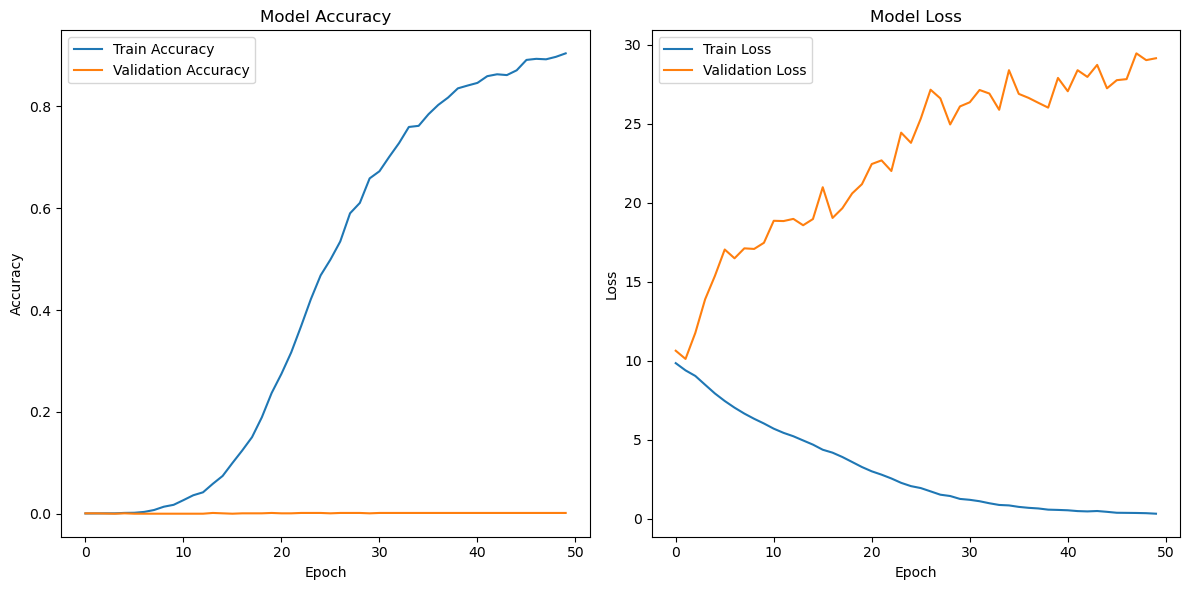

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.savefig('model/food_model_metrics_combined.png')
plt.show()